# Support Vector Machine

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
df = pd.read_csv('../Notebooks/Datasets/SVM_Dataset1.csv', index_col=0)

In [2]:
df

,X1,X2,y
0,2.947814,6.626878,1
1,2.530388,7.785050,1
2,3.566991,5.651046,1
3,3.156983,5.467077,1
4,2.582346,4.457777,-1
5,2.155826,6.222343,-1
6,3.273418,3.520687,-1


In [3]:
X1=df['X1']
X2=df['X2']
X_train=np.array(list(zip(X1,X2)))
X_train

array([[2.947814, 6.626878],
       [2.530388, 7.78505 ],
       [3.566991, 5.651046],
       [3.156983, 5.467077],
       [2.582346, 4.457777],
       [2.155826, 6.222343],
       [3.273418, 3.520687]])

In [4]:
y_train = df['y'].values
print(y_train)

[ 1  1  1  1 -1 -1 -1]


In [5]:
color_ls = []
for k in y_train:
    if k == 1:
        color_ls.append('b')
    else:
        color_ls.append('r')
color_ls

['b', 'b', 'b', 'b', 'r', 'r', 'r']

In [10]:
label = []
for k in y_train:
    if k == 1:
        label.append('H')
    else:
        label.append('NH')
label

['H', 'H', 'H', 'H', 'NH', 'NH', 'NH']

In [11]:
# Scatter plot of data with labels

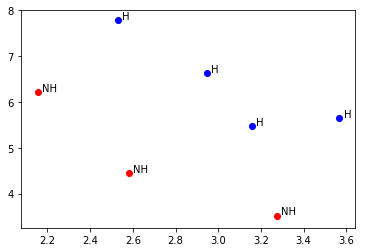

In [12]:

for k, (i,j) in enumerate(X_train):
    plt.scatter(i, j, c = color_ls[k])
    plt.text(i + 0.02, j + 0.02, label[k])

In [14]:
# svm_classifier = svm.SVC(kernel='poly',C=1, degree=2)

svm_classifier = svm.SVC(kernel='linear', C=10)
svm_classifier.fit(X_train, y_train)

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [15]:
def plot_decision_boundary(clf, X, y):
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1 # plus ones for zooming in/out the window
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max),np.arange(x2_min, x2_max))
    Z = clf.decision_function(np.array([xx1.ravel(), xx2.ravel()]).T).reshape(xx1.shape)
    plt.contour(xx1, xx2, Z, colors='b', levels=[-1, 0, 1], alpha=0.4, linestyles=['--', '-', '--'])
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

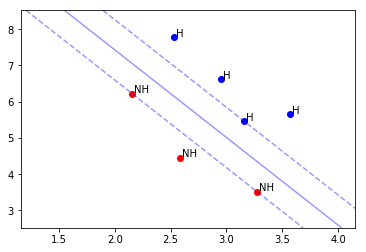

In [16]:
plot_decision_boundary(svm_classifier, X_train, y_train)

for k, (i,j) in enumerate(X_train):
    plt.scatter(i, j, c = color_ls[k])
    plt.text(i+0.02, j+0.02, label[k])

In [ ]:
# Solid line is the decision boundry

In [17]:
# Convention: if it the label is X(upper_case) is a matrix and y(lower_case) is one column 

In [18]:
# Number of Support Vectors for each class:

svm_classifier.n_support_

array([2, 1], dtype=int32)

In [19]:

# What are those Support Vectors:

svm_classifier.support_vectors_


array([[2.155826, 6.222343],
       [3.273418, 3.520687],
       [3.156983, 5.467077]])

In [26]:
df_2 = pd.read_csv('../Notebooks/Datasets/SVM_Dataset2.csv')

In [27]:
df_2

,x1,x2,y
0,7.0,20,-1
1,8.0,12,-1
2,9.0,19,-1
3,10.0,17,-1
4,11.0,15,-1
5,13.0,14,-1
6,14.0,12,-1
7,15.0,14,-1
8,15.0,17,-1
9,16.0,16,-1


In [ ]:
# duplicate the code and change the kernel to "poly" and 

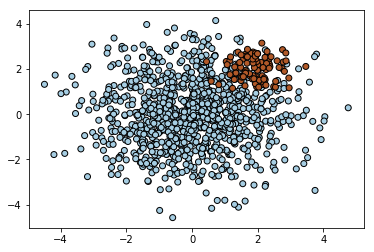

In [32]:
from sklearn import svm
from sklearn.datasets import make_blobs

# we create two clusters of random points
n_samples_1 = 1000
n_samples_2 = 100
centers = [[0.0, 0.0], [2.0, 2.0]]
clusters_std = [1.5, 0.5]

X, y = make_blobs(n_samples=[n_samples_1, n_samples_2],
                  centers=centers,
                  cluster_std=clusters_std,
                  random_state=0, shuffle=False)


# fit the model and get the separating hyperplane
clf = svm.SVC(kernel='linear', C=1.0)
clf.fit(X, y)

# fit the model and get the separating hyperplane using weighted classes
wclf = svm.SVC(kernel='linear', class_weight={1: 10})
wclf.fit(X, y)

# plot the samples
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, edgecolors='k')

# plot the decision functions for both classifiers
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# # create grid to evaluate model
# xx = np.linspace(xlim[0], xlim[1], 30)
# yy = np.linspace(ylim[0], ylim[1], 30)
# YY, XX = np.meshgrid(yy, xx)
# xy = np.vstack([XX.ravel(), YY.ravel()]).T

# # get the separating hyperplane
# Z = clf.decision_function(xy).reshape(XX.shape)

# # plot decision boundary and margins
# a = ax.contour(XX, YY, Z, colors='k', levels=[0], alpha=0.5, linestyles=['-'])

# # get the separating hyperplane for weighted classes
# Z = wclf.decision_function(xy).reshape(XX.shape)

# # plot decision boundary and margins for weighted classes
# b = ax.contour(XX, YY, Z, colors='r', levels=[0], alpha=0.5, linestyles=['-'])

# plt.legend([a.collections[0], b.collections[0]], ["non weighted", "weighted"],
#            loc="upper right")
# plt.show()
